In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from utils.perceptron import Perceptron

In [2]:
RANDOM_SEED = 42
N = 1000

# 1

In [3]:
np.random.seed(RANDOM_SEED)
classes = [0, 1]

mean = [[1.5,1.5], [5,5]]
sigma = [
    [
        [0.5,0],
        [0,0.5],
    ],
    [
        [0.5,0],
        [0,0.5],
    ]
]

label_features = []
label_class = []

for classe in classes:
    features = np.random.multivariate_normal(mean[classe], sigma[classe], size=N)

    label_features.append(features)
    label_class.append([classe] * N)

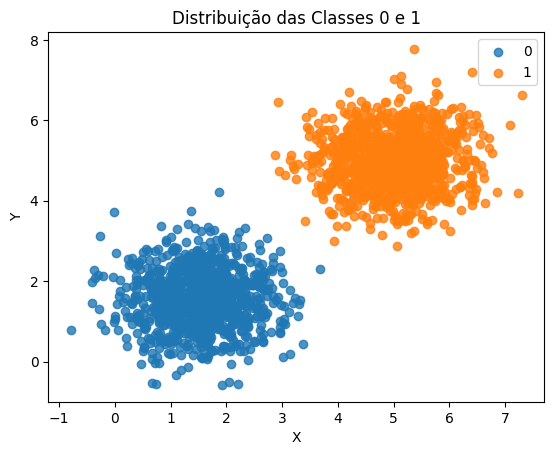

In [4]:
plt.scatter(label_features[0][:,0], label_features[0][:,1], label='0', alpha=0.8)
plt.scatter(label_features[1][:,0], label_features[1][:,1], label='1', alpha=0.8)
plt.title('Distribuição das Classes 0 e 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [5]:
X = np.vstack(label_features)
y = np.hstack(label_class)

In [6]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    shuffle=True
)


In [7]:
np.random.seed(RANDOM_SEED)
weights = np.random.random(2)
bias = np.random.random(1)

print(f"Initial weights: {weights}")
print(f"Initial bias: {bias}")

Initial weights: [0.37454012 0.95071431]
Initial bias: [0.73199394]


In [8]:
np.random.seed(RANDOM_SEED)
prcpt_linear = Perceptron(x=X_train, y=y_train, weights=weights, bias=bias, eta=0.01, att_bias=True)
prcpt_linear.train()
print("converged:", prcpt_linear.converged, "epochs:", prcpt_linear.epochs_run)
print("accuracy per epoch:", prcpt_linear.accuracy_per_epoch)
print("updates per epoch:", prcpt_linear.updates_per_epoch)

converged: True epochs: 3
accuracy per epoch: [0.8821428571428571, 0.9885714285714285, 1.0]
updates per epoch: [165, 16, 0]


In [9]:
y_pred_full, acc_full = prcpt_linear.predict(X_test=X, y_test=y)
print(f"Acurácia no dataset completo: {acc_full:.3f}")

Acurácia no dataset completo: 0.999


In [10]:
w = prcpt_linear.weights
b = float(np.squeeze(prcpt_linear.bias))

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
xs = np.linspace(x_min, x_max, 400)

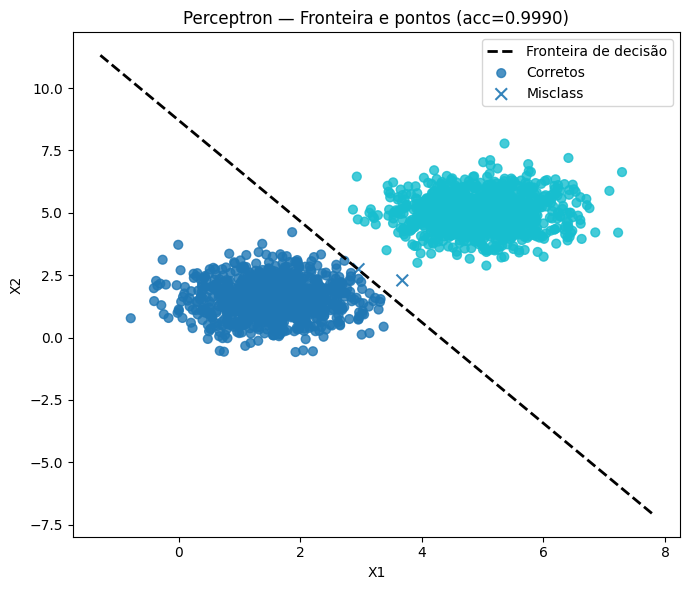

In [11]:
plt.figure(figsize=(7, 6))

if abs(w[1]) > 1e-12:
    ys = -(w[0] / w[1]) * xs - b / w[1]
    plt.plot(xs, ys, '--', linewidth=2, label="Fronteira de decisão", c='black')
else:
    x_v = -b / w[0]
    plt.axvline(x_v, linewidth=2, label="Fronteira de decisão", c='black', linestyle='--')

mis = (y_pred_full != y)

plt.scatter(
    X[~mis, 0], X[~mis, 1],
    c=y[~mis],
    cmap=plt.get_cmap("tab10", 2),
    marker="o", s=40, alpha=0.8,
    label="Corretos"
)

plt.scatter(
    X[mis, 0], X[mis, 1],
    c=y[mis],
    cmap=plt.get_cmap("tab10", 2),
    marker="x", s=70, alpha=0.9,
    label="Misclass"
)

plt.title(f"Perceptron — Fronteira e pontos (acc={acc_full:.4f})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.tight_layout()
plt.show()

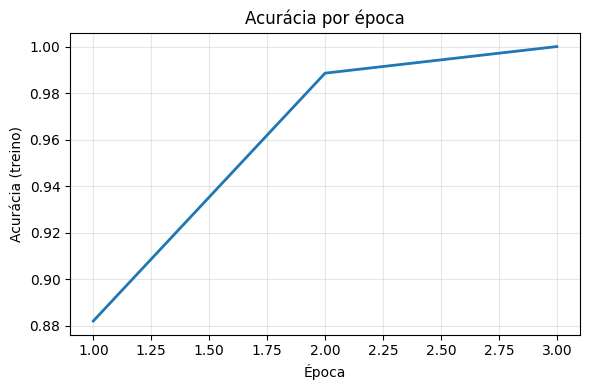

In [12]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, prcpt_linear.epochs_run + 1), prcpt_linear.accuracy_per_epoch, linewidth=2)
plt.xlabel("Época")
plt.ylabel("Acurácia (treino)")
plt.title("Acurácia por época")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

# 2

In [13]:
np.random.seed(RANDOM_SEED)
classes = [0, 1]

mean = [[3,3], [4,4]]
sigma = [
    [
        [1.5,0],
        [0,1.5],
    ],
    [
        [1.5,0],
        [0,1.5],
    ]
]

label_features = []
label_class = []

for classe in classes:
    features = np.random.multivariate_normal(mean[classe], sigma[classe], size=N)

    label_features.append(features)
    label_class.append([classe] * N)

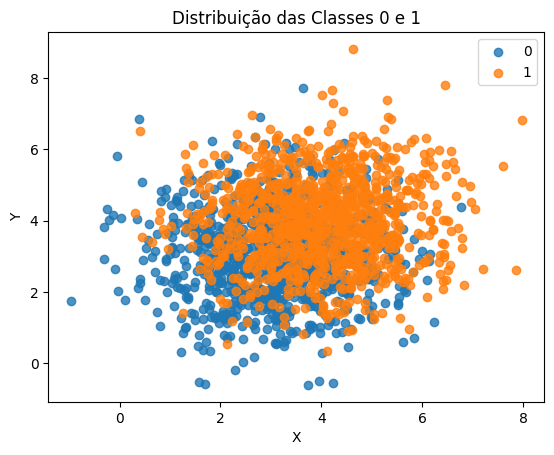

In [14]:
plt.scatter(label_features[0][:,0], label_features[0][:,1], label='0', alpha=0.8)
plt.scatter(label_features[1][:,0], label_features[1][:,1], label='1', alpha=0.8)
plt.title('Distribuição das Classes 0 e 1')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [15]:
X = np.vstack(label_features)
y = np.hstack(label_class)

In [16]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=RANDOM_SEED,
    shuffle=True
)


In [17]:
np.random.seed(RANDOM_SEED)
weights = np.random.random(2)
bias = np.random.random(1)

print(f"Initial weights: {weights}")
print(f"Initial bias: {bias}")

Initial weights: [0.37454012 0.95071431]
Initial bias: [0.73199394]


In [18]:
np.random.seed(RANDOM_SEED)
prcpt_non_linear = Perceptron(x=X_train, y=y_train, weights=weights, bias=bias, eta=0.01, att_bias=True)
prcpt_non_linear.train(patience=30)
print("converged:", prcpt_non_linear.converged, "epochs:", prcpt_non_linear.epochs_run)
if not prcpt_non_linear.converged:
    print(prcpt_non_linear.stop_reason)
print("accuracy per epoch:", prcpt_non_linear.accuracy_per_epoch)
print("updates per epoch:", prcpt_non_linear.updates_per_epoch)

converged: False epochs: 43
No improvement for 30 epochs
accuracy per epoch: [0.49142857142857144, 0.6035714285714286, 0.6057142857142856, 0.6278571428571429, 0.635, 0.6135714285714285, 0.6335714285714286, 0.6328571428571428, 0.6185714285714285, 0.6085714285714285, 0.62, 0.6071428571428572, 0.6478571428571429, 0.6242857142857143, 0.6242857142857143, 0.6278571428571429, 0.6435714285714286, 0.6292857142857142, 0.6428571428571428, 0.6135714285714285, 0.6192857142857142, 0.635, 0.615, 0.6178571428571429, 0.6235714285714286, 0.6185714285714285, 0.6264285714285714, 0.6107142857142858, 0.6028571428571429, 0.615, 0.6121428571428571, 0.6064285714285714, 0.6057142857142856, 0.6321428571428571, 0.6214285714285714, 0.6021428571428571, 0.6057142857142856, 0.5957142857142856, 0.6128571428571429, 0.6321428571428571, 0.6207142857142858, 0.5871428571428572, 0.6207142857142858]
updates per epoch: [712, 555, 552, 521, 511, 541, 513, 514, 534, 548, 532, 550, 493, 526, 526, 521, 499, 519, 500, 541, 533, 51

In [19]:
y_pred_full, acc_full = prcpt_non_linear.predict(X_test=X, y_test=y)
print(f"Acurácia no dataset completo: {acc_full:.3f}")

Acurácia no dataset completo: 0.671


In [20]:
w = prcpt_non_linear.weights
b = float(np.squeeze(prcpt_non_linear.bias))

x_min, x_max = X[:, 0].min() - 0.5, X[:, 0].max() + 0.5
xs = np.linspace(x_min, x_max, 400)

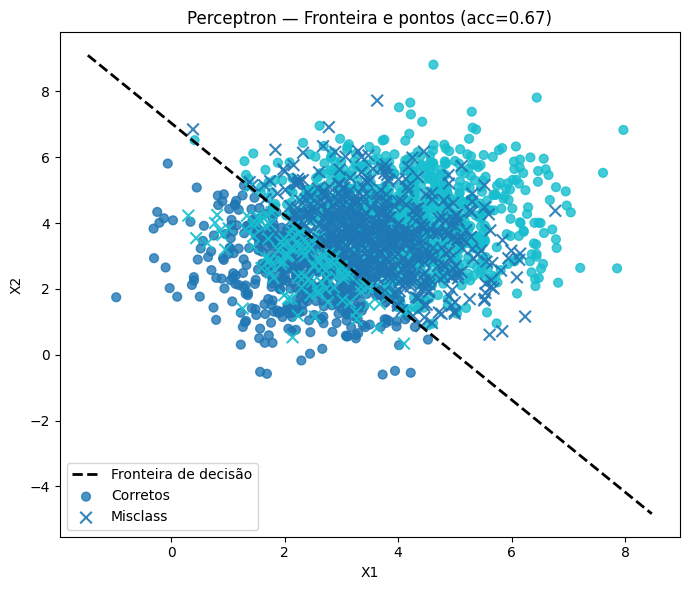

In [21]:
plt.figure(figsize=(7, 6))

if abs(w[1]) > 1e-12:
    ys = -(w[0] / w[1]) * xs - b / w[1]
    plt.plot(xs, ys, '--', linewidth=2, label="Fronteira de decisão", c='black')
else:
    x_v = -b / w[0]
    plt.axvline(x_v, linewidth=2, label="Fronteira de decisão", c='black', linestyle='--')

mis = (y_pred_full != y)

plt.scatter(
    X[~mis, 0], X[~mis, 1],
    c=y[~mis],
    cmap=plt.get_cmap("tab10", 2),
    marker="o", s=40, alpha=0.8,
    label="Corretos"
)

plt.scatter(
    X[mis, 0], X[mis, 1],
    c=y[mis],
    cmap=plt.get_cmap("tab10", 2),
    marker="x", s=70, alpha=0.9,
    label="Misclass"
)

plt.title(f"Perceptron — Fronteira e pontos (acc={acc_full:.2f})")
plt.xlabel("X1")
plt.ylabel("X2")
plt.legend()
plt.tight_layout()
plt.show()

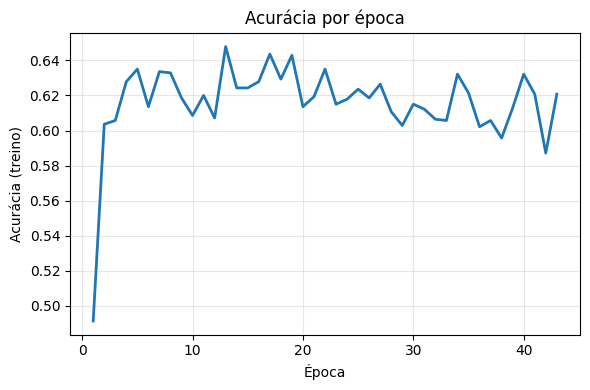

In [22]:
plt.figure(figsize=(6, 4))
plt.plot(np.arange(1, prcpt_non_linear.epochs_run + 1), prcpt_non_linear.accuracy_per_epoch, linewidth=2)
plt.xlabel("Época")
plt.ylabel("Acurácia (treino)")
plt.title("Acurácia por época")
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()